<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчетов-эффективности-обогащения" data-toc-modified-id="Проверка-расчетов-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка расчетов эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металов-(Au,-Ag,-Pb)-на-различных-этапах" data-toc-modified-id="Концентрация-металов-(Au,-Ag,-Pb)-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металов (Au, Ag, Pb) на различных этапах</a></span><ul class="toc-item"><li><span><a href="#Графики" data-toc-modified-id="Графики-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Графики</a></span></li></ul></li><li><span><a href="#Распределение-размеров-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределение-размеров-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-разных-моделей" data-toc-modified-id="Обучение-разных-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей</a></span></li><li><span><a href="#Тест" data-toc-modified-id="Тест-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тест</a></span></li><li><span><a href="#Dummy-Regressor" data-toc-modified-id="Dummy-Regressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Dummy Regressor</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span>

# Описание данных

- Технологический процесс
    - Rougher feed — исходное сырье
    - Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate **— ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
    - Rougher process (англ. «грубый процесс») — флотация
    - Rougher tails — отвальные хвосты
    - Float banks — флотационная установка
    - Cleaner process — очистка
    - Rougher Au — черновой концентрат золота
    - Final Au — финальный концентрат золота
- Параметры этапов
    - air amount — объём воздуха
    - fluid levels — уровень жидкости
    - feed size — размер гранул сырья
    - feed rate — скорость подачи

- Возможные значения для блока [этап]:
    - rougher — флотация
    - primary_cleaner — первичная очистка
    - secondary_cleaner — вторичная очистка
    - final — финальные характеристики
- Возможные значения для блока [тип_параметра]:
    - input — параметры сырья
    - output — параметры продукта
    - state — параметры, характеризующие текущее состояние этапа
    - calculation — расчётные характеристики


# План работы:
- Изучить файлы с данными.
- Проверить расчеты эффективности обогащения и найти MAE между расчётами.
- Проанализируйте отсутствующие признаки в тестовой выборке.
- Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
- Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
- Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
- Написать функцию для вычисления итоговой sMAPE.
- Обучить разные модели, выбрать лучшую модель и проверить её на тестовой выборке.

## Подготовка данных

Импортируем библиотеки и прочтем файлы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
print('Train shape:', data_train.shape)
print('Test shape:', data_test.shape)
print('Full shape:', data_full.shape)

Train shape: (14149, 87)
Test shape: (5290, 53)
Full shape: (19439, 87)


In [4]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Проверка расчетов эффективности обогащения

In [5]:
sns.set(palette='mako', context='talk',style='darkgrid')
def hist(data, column, title):
    plt.figure(figsize=(10,5))
    data[column].hist().set_title(title)

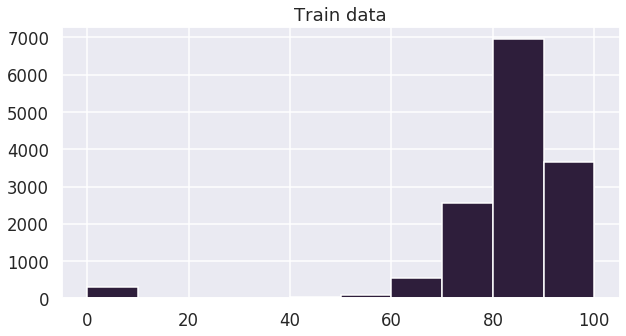

In [6]:
hist(data_train, 'rougher.output.recovery', 'Train data')

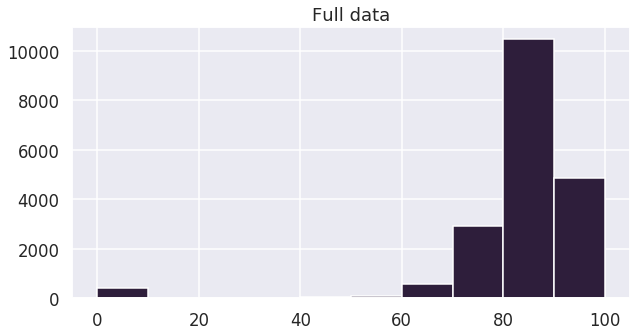

In [7]:
hist(data_full, 'rougher.output.recovery', 'Full data')

In [8]:
data_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Подготовим функцию для проверки расчетов

In [9]:
def recovery(C,F,T):
    final = (C*(F-T)) / (F*(C-T)) * 100
    
    return final

In [10]:
C, F, T = data_train['rougher.output.concentrate_au'], data_train['rougher.input.feed_au'], data_train['rougher.output.tail_au']
train_recovery = recovery(C,F,T)

data_train['check_recovery'] = train_recovery

print('Кол-во строк в обучающей выборке:', data_train.shape[0])
print('Кол-во совпадающих строк:',sum(abs(data_train['rougher.output.recovery'] - train_recovery) < 10**(-4)))
print()
print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], data_train['check_recovery']))

Кол-во строк в обучающей выборке: 14149
Кол-во совпадающих строк: 14149

MAE: 9.682896147825551e-15


Сравним расчеты

In [11]:
df = pd.DataFrame({'original': data_train['rougher.output.recovery'], 'check': data_train['check_recovery']})
df.head()

,original,check
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


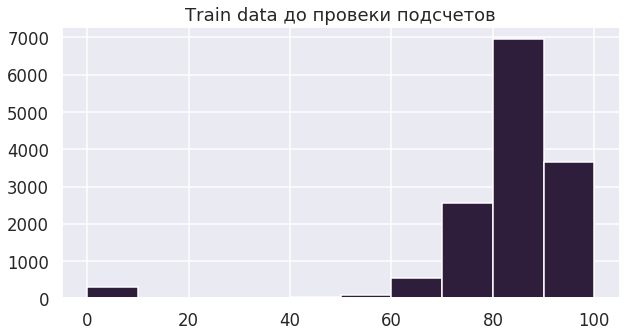

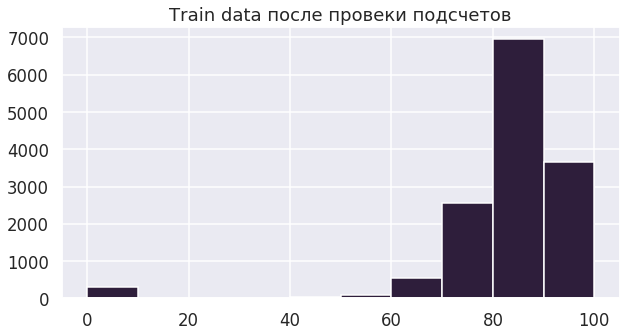

In [12]:
hist(data_train, 'rougher.output.recovery', 'Train data до провеки подсчетов')
hist(data_train, 'check_recovery', 'Train data после провеки подсчетов')

In [13]:
data_train.drop('check_recovery', axis=1, inplace = True)

**Промежуточный вывод**: Эффективность обогащения рассчитана правильно. 

### Анализ признаков

Посмотрим какие признаки отсутствуют в тестовой выборке.

In [14]:
missing_columns = list(set(data_train) - set(data_test))
print('Кол-во признаков недоступных в тестовой выборке:', len(missing_columns))
print('-------------------------')
print(missing_columns)

Кол-во признаков недоступных в тестовой выборке: 34
-------------------------
['rougher.output.concentrate_au', 'rougher.output.tail_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.recovery', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.tail_sol', 'final.output.concentrate_sol', 'final.output.tail_au', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'rougher.output.recovery', 'final.

**Промежуточный вывод**: Из 34 пропущенных признаков: 30 относятся к параметрам продукта, а 4 к расчетным характеристикам. Отсутствуют значения финальных концентраций, а так же информация о хвостовых частях и признаках обогащения.

### Предобработка данных

In [15]:
data_full.dtypes

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

In [16]:
def check(data):
    print(data.dtypes)
    print('-----------------')
    print('Размер:',data.shape)
    print('Кол-во пропусков:', data.isna().sum().sum())
    print('Процент пропусков: {:.2%}'.format(data.isna().sum().sum() / data.shape[0]))
    print('Кол-во дубликатов -', data.duplicated().sum())
    for column in data.columns:
        print()
        print('\033[1mCтолбец\033[0m', column)
        print('Кол-во уникальных значений -', data[column].nunique())
        print('Кол-во дубликатов в столбце -', data[column].duplicated().sum())
        print('Кол-во пропусков:', data[column].isna().sum().sum())
        print()
        print(data[column].value_counts().head())
        print()

In [17]:
sns.set(palette='mako', context='talk',style='darkgrid')
def charts(data, column, title):
    fig, axs = plt.subplots(ncols=2,figsize=(20,5))
    plt.suptitle(title, fontsize = "xx-large")
    distplot = sns.distplot(data[column],ax=axs[0])
    sns.boxplot(data[column], ax=axs[1])

In [18]:
check(data_full)

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object
-----------------
Размер: (19439, 87)
Кол-во пропусков: 4481
Процент пропусков: 23.05%
Кол-во дубликатов - 0

Cтолбец date
Кол-во уникальных значений - 19439
Кол-во дубликатов в столбце - 0
Кол-во пропусков: 0

2016-06-19 17:59:59    1
2018-07-16 22:59:59    1
2016-05-18 23:59:59    1
2017-02-23 04:59:59    1
2016-06-18 03:59:59    1
Name: date, dtype: int64


Cтолбец final.out

In [19]:
data_full.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906


In [20]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Промежуточные выводы**: имеются пропуски (23%), обработаем их перед обучением моделей. Изменили формат столбца date. 

## Анализ данных

### Концентрация металов (Au, Ag, Pb) на различных этапах

In [21]:
print('Концентрация до флотации')
print('Серебро:{: 0.2f}, Свинец:{: 0.2f}, Золото:{: 0.2f}'.
format(data_full['rougher.input.feed_ag'].mean(),
data_full['rougher.input.feed_pb'].mean(),
data_full['rougher.input.feed_au'].mean()))
print()
print('Концентрация после флотации')
print('Серебро:{: 0.2f}, Свинец:{: 0.2f}, Золото:{: 0.2f}'.
format(data_full["rougher.output.concentrate_ag"].mean(),
data_full["rougher.output.concentrate_pb"].mean(),
data_full["rougher.output.concentrate_au"].mean()))
print()
print('Концентрация после первичной очистки')
print('Серебро:{: 0.2f}, Свинец:{: 0.2f}, Золото:{: 0.2f}'.
format(data_full['primary_cleaner.output.concentrate_ag'].mean(),
data_full['primary_cleaner.output.concentrate_pb'].mean(),
data_full['primary_cleaner.output.concentrate_au'].mean()))
print()
print('Концентрация поле вторичной очистки')
print('Серебро:{: 0.2f}, Свинец:{: 0.2f}, Золото:{: 0.2f}'.
format(data_full['final.output.concentrate_ag'].mean(),
data_full['final.output.concentrate_pb'].mean(),
data_full['final.output.concentrate_au'].mean()))

Концентрация до флотации
Серебро: 8.79, Свинец: 3.60, Золото: 8.27

Концентрация после флотации
Серебро: 11.99, Свинец: 7.61, Золото: 19.77

Концентрация после первичной очистки
Серебро: 8.44, Свинец: 9.83, Золото: 32.12

Концентрация поле вторичной очистки
Серебро: 5.17, Свинец: 9.98, Золото: 44.08


In [22]:
ag = pd.DataFrame({'rougher.input': data_full['rougher.input.feed_ag'], 'rougher.output': data_full['rougher.output.concentrate_ag'], 'primary_cleaner.output': data_full['primary_cleaner.output.concentrate_ag'], 'final.output': data_full['final.output.concentrate_ag']})

au = pd.DataFrame({'rougher.input': data_full['rougher.input.feed_au'], 'rougher.output': data_full['rougher.output.concentrate_au'], 'primary_cleaner.output': data_full['primary_cleaner.output.concentrate_au'], 'final.output': data_full['final.output.concentrate_au']})

pb = pd.DataFrame({'rougher.input': data_full['rougher.input.feed_pb'], 'rougher.output': data_full['rougher.output.concentrate_pb'], 'primary_cleaner.output': data_full['primary_cleaner.output.concentrate_pb'], 'final.output': data_full['final.output.concentrate_pb']})

pb.head()

,rougher.input,rougher.output,primary_cleaner.output,final.output
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


#### Графики

In [23]:
def concentrate(data):
    fig, ax = plt.subplots(1,4, sharey=True, figsize=(20,7))
    
    columns = data.columns

    for i in range(len(columns)):
    
        sns.barplot(y=columns[i], ax=ax[i], data=data)
        ax[i].set_xlabel(columns[i])
        ax[i].set_ylabel('')
    
        fig.show()

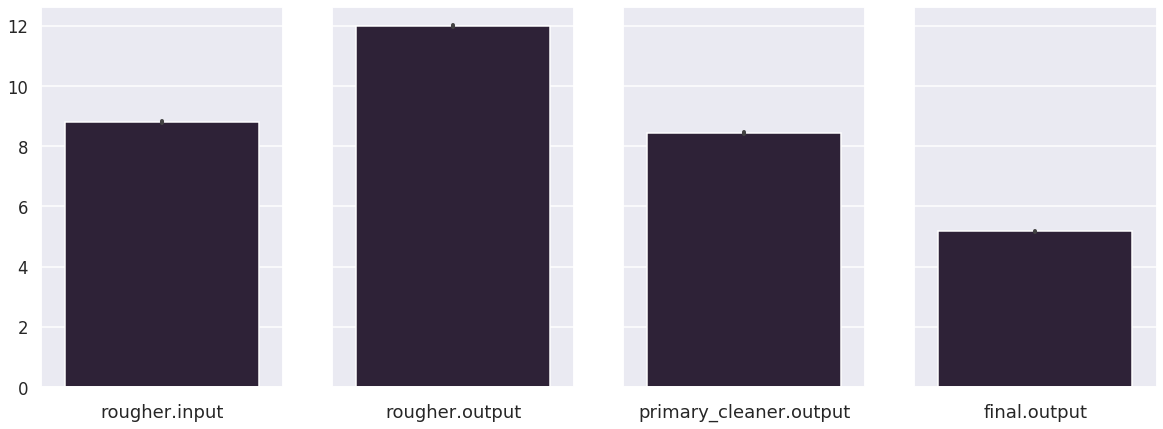

In [24]:
concentrate(ag)

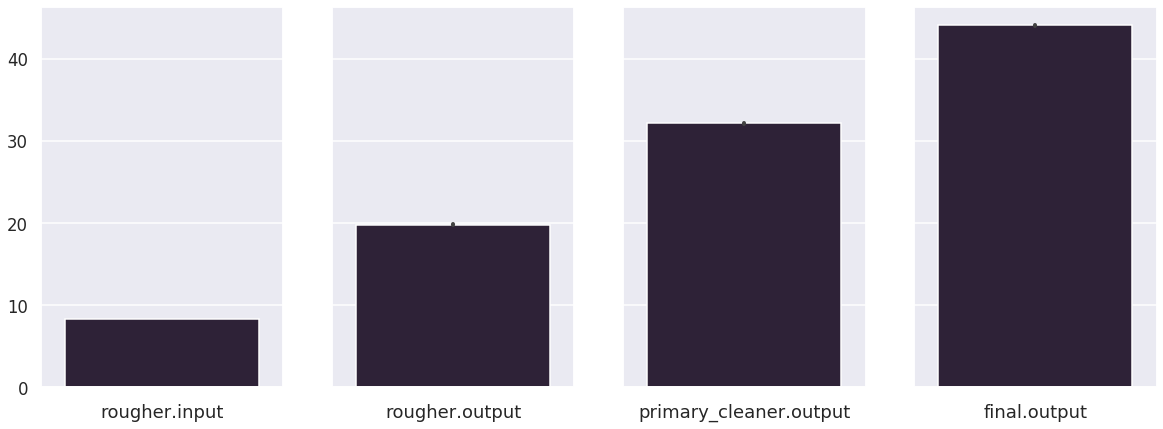

In [25]:
concentrate(au)

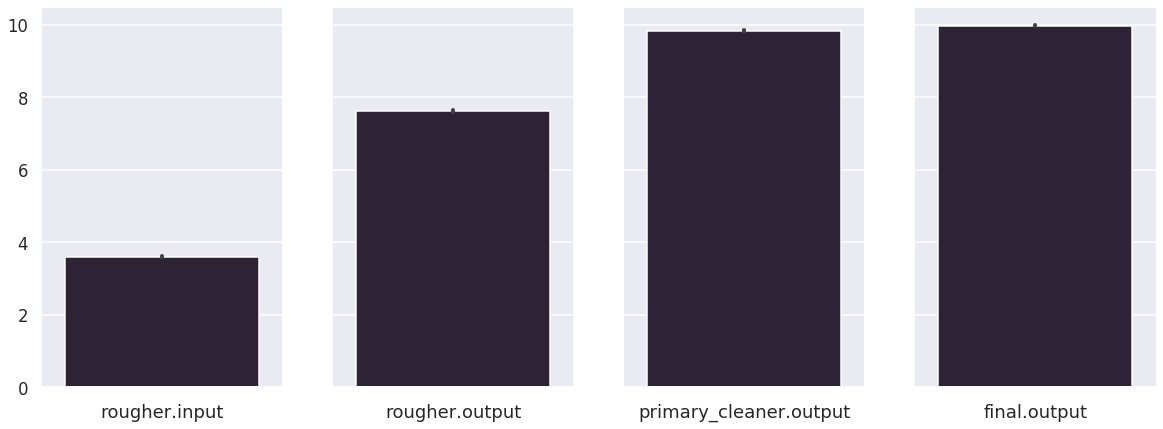

In [26]:
concentrate(pb)

**Промежуточные выводы**: С каждым этапом увеличивается концентрация золота и свинца, а концентрация серебра уменьшается.

### Распределение размеров гранул на обучающей и тестовой выборках

Построим графики для наглядности

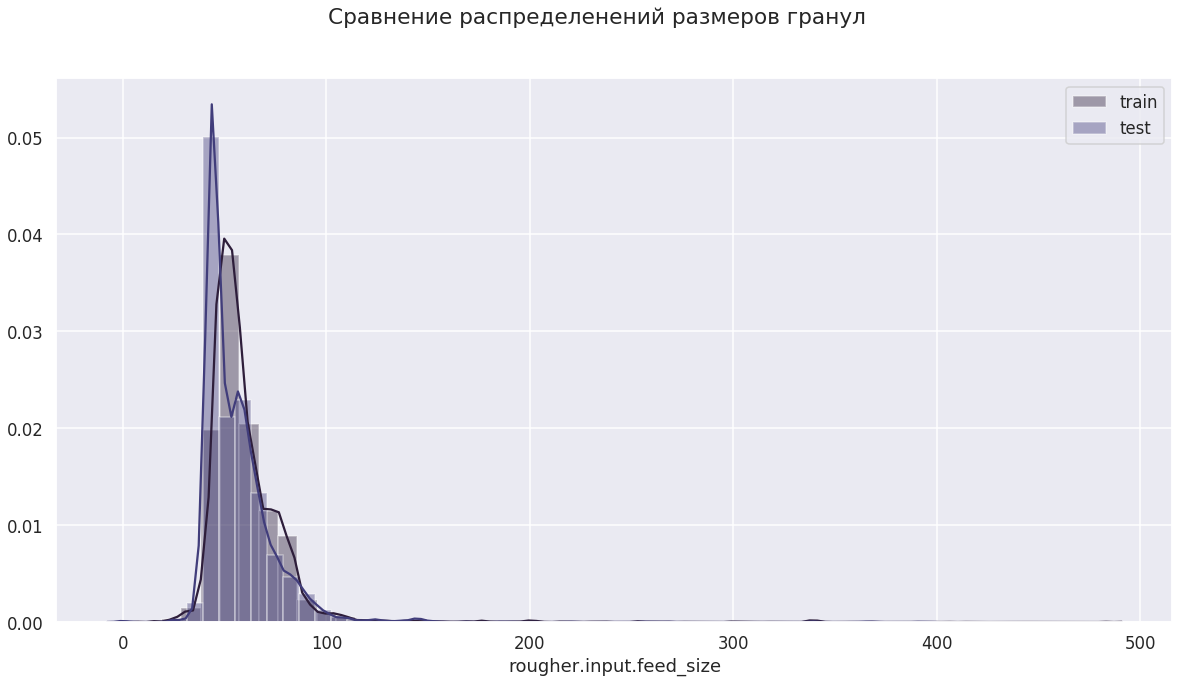

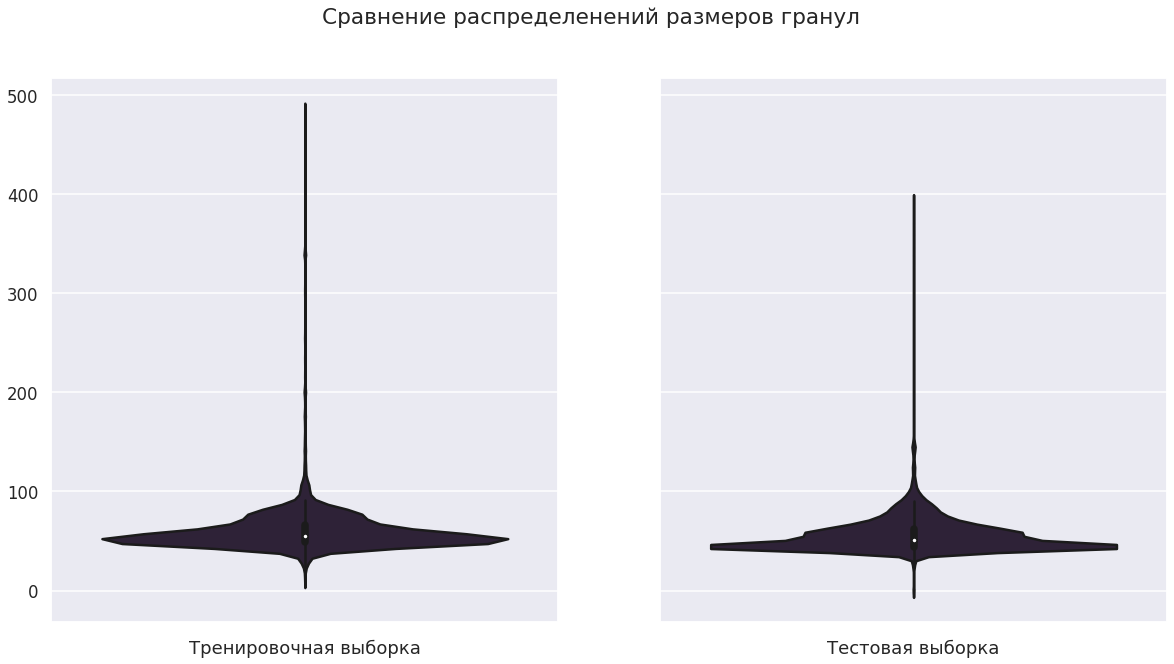

In [27]:
plt.figure(figsize=(20,10))
plt.suptitle('Сравнение распределенений размеров гранул');
sns.distplot(data_train['rougher.input.feed_size'].dropna(), label='train')
sns.distplot(data_test['rougher.input.feed_size'].dropna(), label='test')
plt.legend()

fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,10))

sns.violinplot(y='rougher.input.feed_size', linewidth=2.5, data=data_train, ax=ax[0])
ax[0].set_xlabel('Тренировочная выборка')
ax[0].set_ylabel('')

sns.violinplot(y='rougher.input.feed_size', linewidth=2.5, data=data_test, ax=ax[1])
ax[1].set_xlabel('Tестовая выборка')
ax[1].set_ylabel('')

plt.suptitle('Сравнение распределенений размеров гранул');

**Промежуточные выводы**: Видим, что имеются выбросы, но как видно из графиков оба средних значения попадают в один диапазон, что может говорить об примерном равном распределении в обоих выборках.

### Суммарная концентрация всех веществ на разных стадиях

In [28]:
sum_conc = pd.DataFrame()

sum_conc['Сырье'] = data_full[['rougher.input.feed_au', 
                               'rougher.input.feed_ag', 
                               'rougher.input.feed_pb',
                              'rougher.input.feed_sol'] ].sum(axis=1)
sum_conc['Черновой'] = data_full[['rougher.output.concentrate_au', 
                                'rougher.output.concentrate_ag', 
                                'rougher.output.concentrate_pb',
                               'rougher.output.concentrate_sol']].sum(axis=1)

sum_conc['Финальный'] = data_full[['final.output.concentrate_au', 
                               'final.output.concentrate_ag',
                               'final.output.concentrate_pb',
                               'final.output.concentrate_sol']].sum(axis=1)

sum_conc.head()

,Сырье,Черновой,Финальный
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667


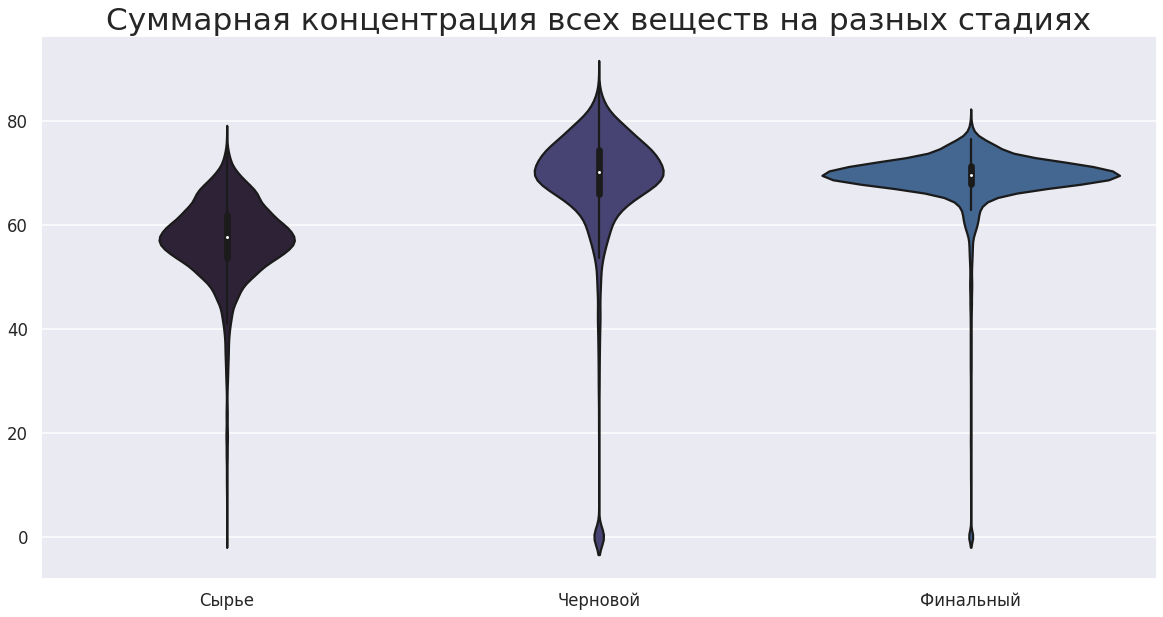

In [29]:
plt.figure(figsize=(20,10))
plt.title('Суммарная концентрация всех веществ на разных стадиях', 
          fontsize='xx-large')
sns.violinplot(data=sum_conc)

In [101]:
sum_new = sum_conc[sum_conc[['Сырье','Черновой','Финальный']] > 0]

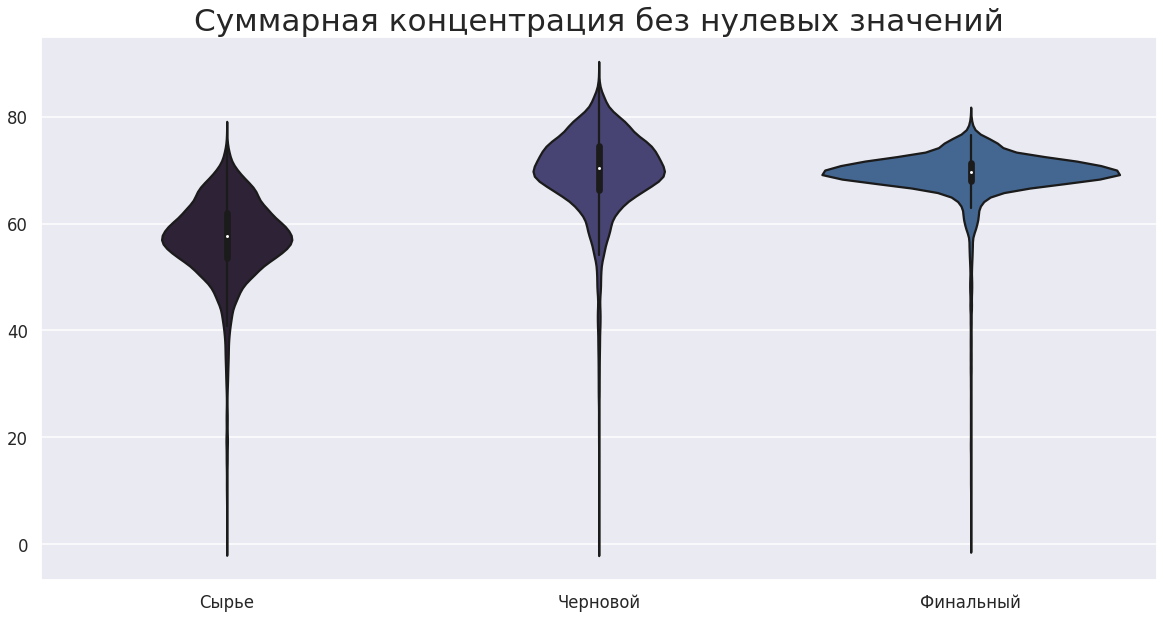

In [102]:
plt.figure(figsize=(20,10))
plt.title('Суммарная концентрация без нулевых значений', 
          fontsize='xx-large')
sns.violinplot(data=sum_new)

In [124]:
sum_new.describe()

,Сырье,Черновой,Финальный
count,19439.000000,19045.000000,19341.000000
mean,57.148832,69.554283,68.968893
std,7.712767,7.902232,5.655203
min,0.040000,0.040000,0.040000
25%,53.507961,66.322498,67.958512
50%,57.577384,70.340371,69.612326
75%,61.951075,74.469222,71.378059
max,76.978947,88.140119,80.210644


**Промежуточные выводы**: Имеются выбросы, много значений нуля, убираем их.

## Модель

### Функция для вычисления итоговой sMAPE

In [30]:
def sMAPE(true, pred):
    count = np.mean(abs(true - pred)/((abs(true)+abs(pred))/2))*100
    return count


In [31]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    final = 0.25*sMAPE_rougher + 0.75*sMAPE_final
    return final

### Обучение разных моделей

In [32]:
final_columns = [col for col in data_train.columns if col in data_test.columns]
final_columns.append('rougher.output.recovery')
final_columns.append('final.output.recovery')

In [33]:
train_data = data_train[final_columns]
full_data = data_full[final_columns]
test_data = data_test.merge(full_data[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [34]:
train_data.shape, test_data.shape

((12679, 55), (5229, 55))

In [35]:
train_data = train_data[train_data['rougher.output.recovery'] > 1]
test_data = test_data[test_data['rougher.output.recovery'] > 1]
train_data = train_data[train_data['final.output.recovery'] > 1]
test_data = test_data[test_data['final.output.recovery'] > 1]

In [36]:
#train
target_train_rougher = train_data['rougher.output.recovery']
features_train_rougher = train_data.drop(['rougher.output.recovery', 
                                 'final.output.recovery', 'date'], axis=1)

target_train_final = train_data['final.output.recovery']
features_train_final = train_data.drop(['rougher.output.recovery', 
                                 'final.output.recovery', 'date'], axis=1)
#test
target_test_rougher = test_data['rougher.output.recovery']
features_test_rougher = test_data.drop(['rougher.output.recovery', 
                                 'final.output.recovery', 'date'], axis=1)

target_test_final = test_data['final.output.recovery']
features_test_final = test_data.drop(['rougher.output.recovery', 
                                 'final.output.recovery', 'date'], axis=1)



print(target_train_rougher.shape[0])
print(features_train_rougher.shape[0])
print(target_train_final.shape[0])
print(target_test_final.shape[0])

12434
12434
12434
5105


In [37]:
my_score = make_scorer(sMAPE, greater_is_better= False)

In [38]:
model_1 = LinearRegression()
model_2 = RandomForestRegressor(random_state=12345)
model_3 = DecisionTreeRegressor(random_state=12345)

param_LR = {'fit_intercept':[True,False], 'copy_X':[True, False], 
                  'normalize':[True,False]}
param_RF = {'n_estimators':[5,100],
             'max_depth':[1,10], 'min_samples_split': [2, 3]}
param_DT= {'max_depth':[1,20], 'splitter':('best','random'), 'min_samples_split':np.arange(2,10)}

In [39]:
grid_rougher_LR = GridSearchCV(model_1 ,param_grid = param_LR,scoring= my_score)
grid_final_LR = GridSearchCV(model_1 ,param_grid = param_LR,scoring= my_score)

grid_rougher_RF = GridSearchCV(model_2,param_grid = param_RF,scoring= my_score)
grid_final_RF = GridSearchCV(model_2,param_grid = param_RF,scoring= my_score)

grid_rougher_DT = GridSearchCV(model_3,param_grid = param_DT,scoring= my_score)
grid_final_DT = GridSearchCV(model_3,param_grid = param_DT,scoring= my_score)

In [40]:
#Линейная регрессия
grid_rougher_LR.fit(features_train_rougher, target_train_rougher)
grid_final_LR.fit(features_train_final, target_train_final)

best_score_rougher_LR = grid_rougher_LR.best_score_
best_score_final_LR = grid_final_LR.best_score_

print('LinearRegression | rougher:',round(grid_rougher_LR.best_score_,4), 
      '| final:', round(grid_final_LR.best_score_, 4))
print('Best rougher гиперпараметры:',grid_rougher_LR.best_params_)
print('Best final гиперпараметры:',grid_final_LR.best_params_)
print()

#Случаный лес регрессия
grid_rougher_RF.fit(features_train_rougher, target_train_rougher)
grid_final_RF.fit(features_train_final, target_train_final)

best_score_rougher_RF = grid_rougher_RF.best_score_
best_score_final_RF = grid_final_RF.best_score_

print('Random Forest | rougher:',round(grid_rougher_RF.best_score_,4), 
      '| final:', round(grid_final_RF.best_score_,4))
print('Best rougher гиперпараметры:', grid_rougher_RF.best_params_)
print('Best final гиперпараметры:', grid_final_RF.best_params_)
print()


#Древо решений регрессия
grid_rougher_DT.fit(features_train_rougher, target_train_rougher)
grid_final_DT.fit(features_train_final, target_train_final)

best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

print('Decision Tree | rougher:', round(grid_rougher_DT.best_score_,4), 
      '| final:', round(grid_final_DT.best_score_,4))
print('Best rougher гиперпараметры:',grid_rougher_DT.best_params_)
print('Best final гиперпараметры:',grid_final_DT.best_params_)
print()



LinearRegression | rougher: -9.1235 | final: -11.5752
Best rougher гиперпараметры: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best final гиперпараметры: {'copy_X': True, 'fit_intercept': True, 'normalize': True}

Random Forest | rougher: -7.6366 | final: -9.1832
Best rougher гиперпараметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best final гиперпараметры: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}

Decision Tree | rougher: -8.4072 | final: -9.2702
Best rougher гиперпараметры: {'max_depth': 20, 'min_samples_split': 5, 'splitter': 'random'}
Best final гиперпараметры: {'max_depth': 1, 'min_samples_split': 2, 'splitter': 'best'}



In [43]:
print('final sMAPE LR on train', final_sMAPE(best_score_rougher_LR,best_score_final_LR))
print('final sMAPE RF on train', final_sMAPE(best_score_rougher_RF,best_score_final_RF))
print('final sMAPE DT  on train', final_sMAPE(best_score_rougher_DT,best_score_final_DT))

final sMAPE LR on train -10.962308353980418
final sMAPE RF on train -8.796526535686427
final sMAPE DT  on train -9.054485907768038


**Промежуточные выводы**: Из трех выбранных моделей тренировочной выборке, лучшего всего Random Forest. Decision Tree не сильно отличается, попробуем модель тоже на тестовой выборке.

### Тест

Проведем тест на двух моделях Decision Tree и Random Forest

- Random Forest

In [45]:
rougher_test = grid_rougher_RF.predict(features_test_rougher)
final_test = grid_final_RF.predict(features_test_final)

In [46]:
final_sMAPE(sMAPE(target_test_rougher,rougher_test),sMAPE(target_test_final,final_test))

6.980905308423177

- Decision Tree

In [47]:
DT_rougher_test = grid_rougher_DT.predict(features_test_rougher)
DT_final_test = grid_final_DT.predict(features_test_final)

In [48]:
final_sMAPE(sMAPE(target_test_rougher,DT_rougher_test),sMAPE(target_test_final,DT_final_test))

7.872940054650133

**Промежуточный вывод**: Random Forest показал себя лучше на тестовой выборке.

### Dummy Regressor

In [105]:
from sklearn.dummy import DummyRegressor

In [126]:
dummy_rougher = DummyRegressor(strategy = 'median')
dummy_final = DummyRegressor(strategy = 'median')

dummy_rougher.fit(features_train_rougher, target_train_rougher)
dummy_final.fit(features_train_final, target_train_final)

dummy_rougher_pred = dummy_rougher.predict(features_test_rougher)
dummy_final_pred = dummy_final.predict(features_test_final)

smape = final_sMAPE(sMAPE(target_test_rougher, dummy_rougher_pred),sMAPE(target_test_final,dummy_final_pred))

print(smape) 

7.290407469935616


In [122]:
print('Random Forest:', 
      final_sMAPE(sMAPE(target_test_rougher,rougher_test),sMAPE(target_test_final,final_test)),
      '|', 'Dummy:', smape)

Random Forest: 6.980905308423177 | Dummy: 7.290407469935616


**Промежуточный вывод**: Ошибка на тест приемлема, так как она меньше чем на константном алгоритме.

## Вывод

- Перед нами стояла задача - подготовиь прототип модели машинного обучения. Для решения данной задачи были подготовленны и проанализированны данные, построенны и обученны модели: LinearRegression, Random Forest и Decision Tree. 
- Регрессор Random Forest показал себя лучше остальных моделей. Ошибка на тестовой выборке составила: 6.98, а наилучшие гиперпараметры: 
    - rougher: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
    - final: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
